In [3]:
"""# Customer Segmentation for an E-commerce Company This notebook performs customer segmentation using cluster analysis on the `Online Retail.xlsx` dataset. We will use k-means and hierarchical clustering techniques to segment customers based on their purchasing behavior.

## 1. Setup and Data Preparation

### Install Required Libraries

First, ensure that all necessary libraries are installed.

```python"""
!pip install pandas numpy scikit-learn matplotlib seaborn openpyxl


In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/Online Retail.xlsx'
df = pd.read_excel(file_path)  # Adjust sheet_name if needed

# Display basic information and first few rows of the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    

In [7]:
# Drop missing values and duplicates
df = df.dropna(subset=['CustomerID'])
df = df.drop_duplicates()

# Filter out negative and zero values for 'Quantity' and 'UnitPrice'
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Display cleaned data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029

In [8]:
# Create 'TotalSpend' feature
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# Aggregate customer data
customer_data = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalSpend': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

customer_data.columns = ['CustomerID', 'TotalQuantity', 'TotalSpend', 'NumInvoices']

# Display the aggregated customer data
print(customer_data.head())

   CustomerID  TotalQuantity  TotalSpend  NumInvoices
0     12346.0          74215    77183.60            1
1     12347.0           2458     4310.00            7
2     12348.0           2341     1797.24            4
3     12349.0            631     1757.55            1
4     12350.0            197      334.40            1


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalQuantity', 'TotalSpend', 'NumInvoices']])

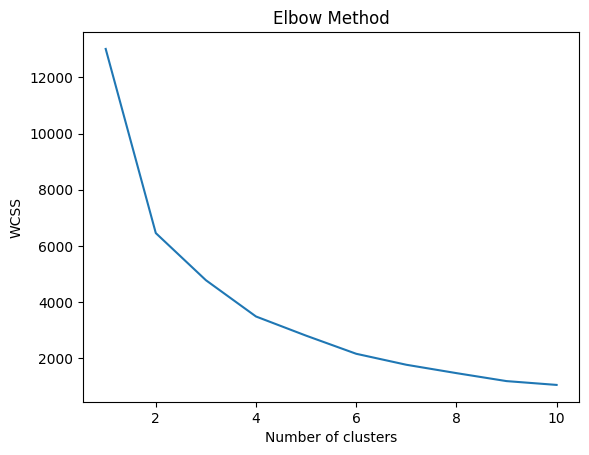

   CustomerID  TotalQuantity  TotalSpend  NumInvoices  Cluster
0     12346.0          74215    77183.60            1        1
1     12347.0           2458     4310.00            7        0
2     12348.0           2341     1797.24            4        0
3     12349.0            631     1757.55            1        0
4     12350.0            197      334.40            1        0


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Display the data with cluster labels
print(customer_data.head())

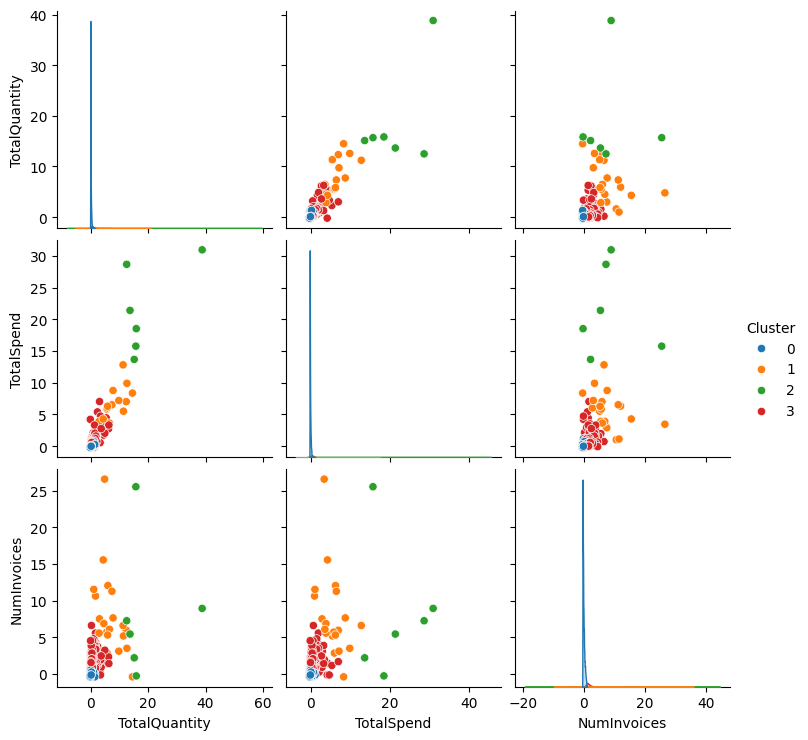

In [11]:
import seaborn as sns

# Add cluster labels to the scaled data for visualization
import numpy as np
scaled_df = pd.DataFrame(customer_data_scaled, columns=['TotalQuantity', 'TotalSpend', 'NumInvoices'])
scaled_df['Cluster'] = customer_data['Cluster']

# Plot clusters
sns.pairplot(scaled_df, hue='Cluster', palette='tab10')
plt.show()

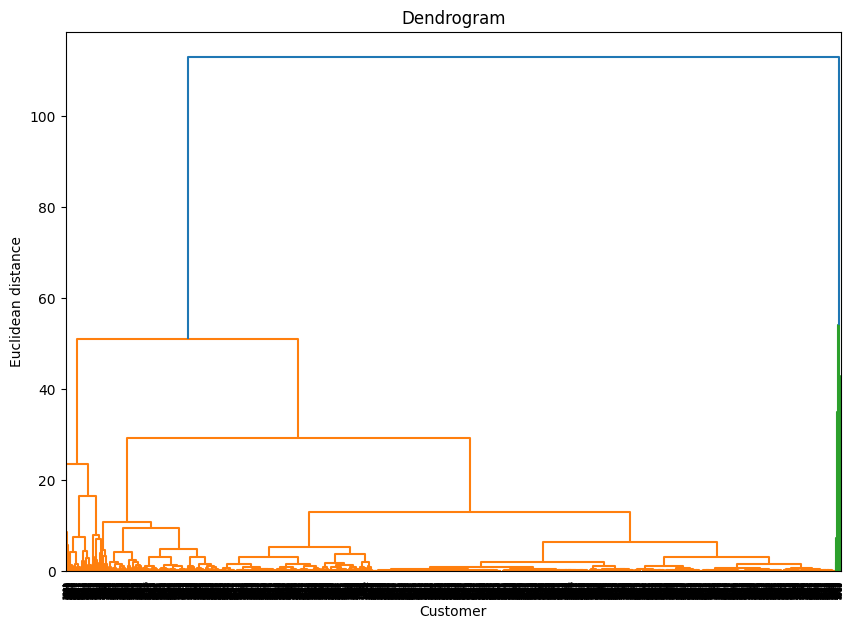

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Perform hierarchical clustering
Z = linkage(customer_data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show()

In [13]:
from scipy.cluster.hierarchy import fcluster

# Form clusters
max_d = 4  # Number of clusters
clusters = fcluster(Z, max_d, criterion='maxclust')

customer_data['HierarchicalCluster'] = clusters

# Display the data with hierarchical cluster labels
print(customer_data.head())

   CustomerID  TotalQuantity  TotalSpend  NumInvoices  Cluster  \
0     12346.0          74215    77183.60            1        1   
1     12347.0           2458     4310.00            7        0   
2     12348.0           2341     1797.24            4        0   
3     12349.0            631     1757.55            1        0   
4     12350.0            197      334.40            1        0   

   HierarchicalCluster  
0                    4  
1                    2  
2                    2  
3                    2  
4                    2  


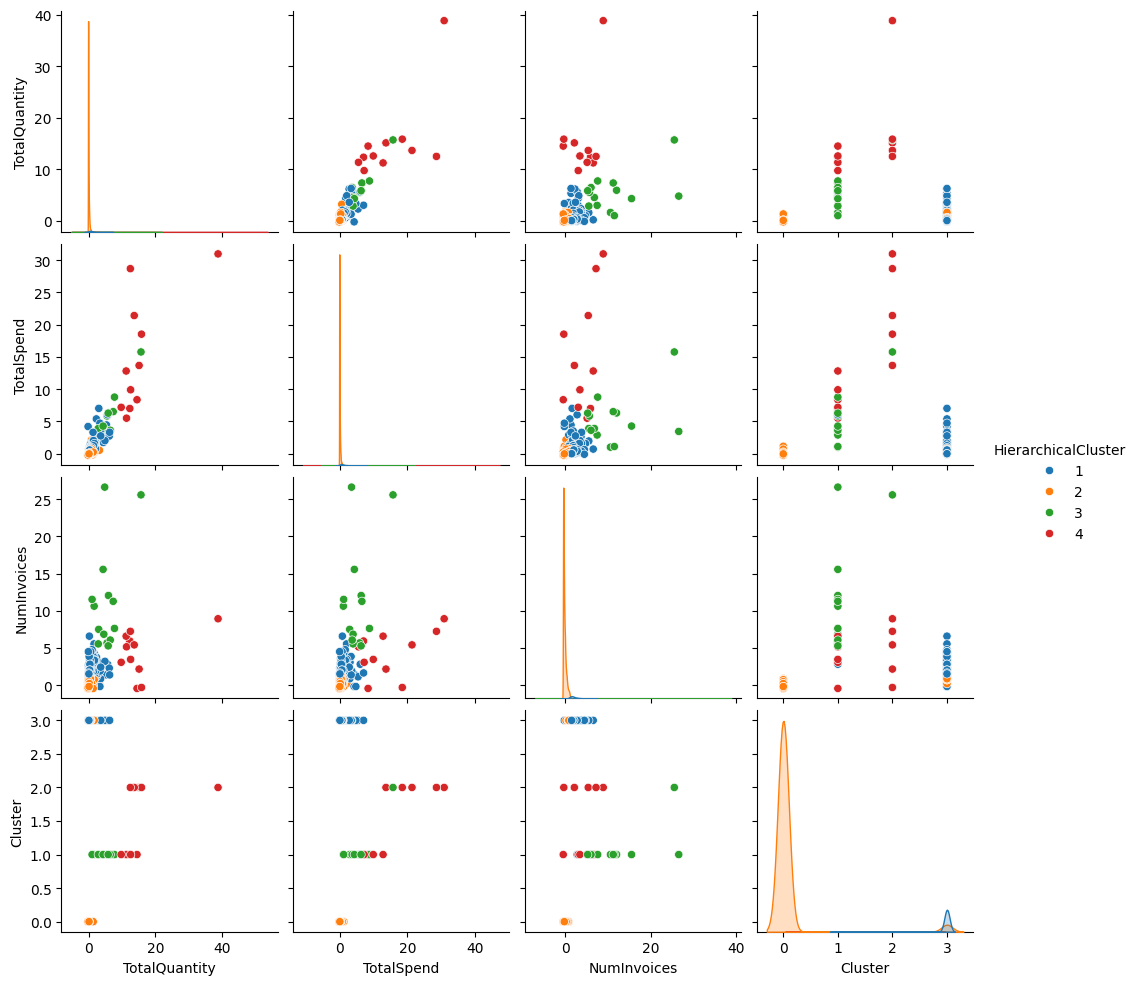

In [14]:
# Add hierarchical cluster labels to the scaled data for visualization
scaled_df['HierarchicalCluster'] = customer_data['HierarchicalCluster']

# Plot clusters
sns.pairplot(scaled_df, hue='HierarchicalCluster', palette='tab10')
plt.show()